
# Pregunta 2 (10 puntos)
# Antes de resolver los incisos, se recomienda leer todo el enunciado para identificar apropiadamente los tipos de datos de cada argumento de entrada de su función y evitar arrastre de error.

La siguiente es una ecuación arbitraria que contempla la relación entre 3 arreglos:
$$S = \sum_{i=0}^{n-1} \left( \prod_{j=0}^{n-1} (A_i \cdot B_j + C_i) \right)
$$

Donde $A_i$ y $C_i$ son los términos i-ésimos de los arreglos A y C y $B_j$ es el término j-ésimo. Se sabe que los arreglos A y C son valores enteros con tamaño de elemento de 2 bytes y que B es un arreglo con alta precisión. Además, el resultado es un número de presición simple.

Siendo así, se le pide lo siguiente:

a) Codificar una función en C que resuelva la ecuación propuesta. Además, considerar que su función debe ser de tipo void y debe dar la solución a través de un argumento de un puntero como argumento de entrada.

Tenemos 3 arreglos: A,B y C. A y C son valores enteros de elemento de 2 bytes. y B esun arreglo con alta precisión.

In [ ]:
%%file libreria_C.c

void funcion(short* a, double *b, short* c, unsigned long long N, float *s){
    float suma = 0; // Variable para almacenar la suma final
    for(int i=0;i<N;i++){ // Iteración sobre el arreglo a
        float factor = 1; // Inicializar el factor en 1 para el producto
        for(int j=0;j<N;j++){ // Iteración sobre el arreglo b
            // Se multiplica el valor de a en la posición i con el valor de b en la posición j,
            // y se suma el valor de c en la posición i
            factor *= ((float)a[i]*b[j]+(float)c[i]);
        }
        suma += factor; // Se agrega el factor calculado a la suma total
    }
    *s = suma; // Se asigna la suma al valor apuntado por s
}


Overwriting libreria_C.c


b) Elegir la bandera que le permita desensamblar el código de manera más reducida y generar la ecuación para todo N:

In [ ]:
! gcc -Os -c libreria_C.c -o libreria_C.o

In [ ]:
! objdump -M intel -j .text -D libreria_C.o


libreria_C.o:     file format elf64-x86-64


Disassembly of section .text:

0000000000000000 <funcion>:
   0:	f3 0f 1e fa          	endbr64 
   4:	49 89 f1             	mov    r9,rsi
   7:	31 c0                	xor    eax,eax
   9:	0f 57 d2             	xorps  xmm2,xmm2
   c:	48 39 c1             	cmp    rcx,rax
   f:	74 47                	je     58 <funcion+0x58>
  11:	f3 0f 10 0d 00 00 00 	movss  xmm1,DWORD PTR [rip+0x0]        # 19 <funcion+0x19>
  18:	00 
  19:	31 f6                	xor    esi,esi
  1b:	48 39 f1             	cmp    rcx,rsi
  1e:	74 2f                	je     4f <funcion+0x4f>
  20:	44 0f bf 14 47       	movsx  r10d,WORD PTR [rdi+rax*2]
  25:	f3 0f 5a c9          	cvtss2sd xmm1,xmm1
  29:	f2 41 0f 2a c2       	cvtsi2sd xmm0,r10d
  2e:	44 0f bf 14 42       	movsx  r10d,WORD PTR [rdx+rax*2]
  33:	f2 41 0f 59 04 f1    	mulsd  xmm0,QWORD PTR [r9+rsi*8]
  39:	48 ff c6             	inc    rsi
  3c:	f2 41 0f 2a da       	cvtsi2sd xmm3,r10d
  41:	f2 0f 58 c3          	addsd

Para hallar la ecuación debemos hacer lo siguiente:

c) Codificar una función en Python que resuelva la ecuación propuesta. Considerar que esta función tampoco debe tener valor de retorno.

In [ ]:
def funcion_py(a, b, c, N, s):
    suma = 0  # Variable para almacenar la suma final
    for i in range(0, N):  # Iteración sobre el rango de 0 a N-1
        factor = 1  # Inicializar el factor en 1 para el producto
        for j in range(0, N):  # Iteración sobre el rango de 0 a N-1
            # Se multiplica el valor de a en la posición i con el valor de b en la posición j,
            # y se suma el valor de c en la posición i
            factor *= a[i] * b[j] + c[i]
        suma += factor  # Se agrega el factor calculado a la suma total
    s[0] = suma  # Se asigna la suma al primer elemento de s


d) ¿A partir de qué valor de N se produce un fallo de página?

In [ ]:
! getconf -a| grep PAGE

PAGESIZE                           4096
PAGE_SIZE                          4096
_AVPHYS_PAGES                      2174982
_PHYS_PAGES                        3322621


El tamaño de página es de 4096 Bytes. Asimismo, recordemos que la entrada de la función cuyo tipo de dato ocupa más espacio es el arreglo B de elementos del tipo double. Por lo tanto cada elemento del arreglo ocupa 8 Bytes y, como máximo, dentro de una misma página entran 4096/8 = 512 elementos del arreglo. Con ello en cuenta, en caso N sea 513 o un número mayor, se producirá un fallo de página, puesto que el último elemento del arreglo B no se encuentra en la misma página que el resto de elementos

e) ¿A partir de qué valor de N se produce un fallo de caché?

In [ ]:
! getconf -a| grep CACHE

LEVEL1_ICACHE_SIZE                 32768
LEVEL1_ICACHE_ASSOC                
LEVEL1_ICACHE_LINESIZE             64
LEVEL1_DCACHE_SIZE                 32768
LEVEL1_DCACHE_ASSOC                8
LEVEL1_DCACHE_LINESIZE             64
LEVEL2_CACHE_SIZE                  262144
LEVEL2_CACHE_ASSOC                 8
LEVEL2_CACHE_LINESIZE              64
LEVEL3_CACHE_SIZE                  57671680
LEVEL3_CACHE_ASSOC                 20
LEVEL3_CACHE_LINESIZE              64
LEVEL4_CACHE_SIZE                  0
LEVEL4_CACHE_ASSOC                 
LEVEL4_CACHE_LINESIZE              


El tamaño de bloque es de 64 Bytes. Asimismo, recordemos que la entrada de la función cuyo tipo de dato ocupa más espacio es el arreglo B de elementos del tipo double. Por lo tanto cada elemento del arreglo ocupa 8 Bytes y, como máximo, dentro de un mismo bloque entran 64/8 = 8 elementos del arreglo. Con ello en cuenta, en caso N sea 9 o un número mayor, se puede producir un fallo de caché, puesto que el último elemento del arreglo B no se encuentra en el mismo bloque que el resto de elementos.

f) Llamar a la librería de C a través de Ctypes. Considerar que en este inciso se puede descontar puntaje adicional si es que los tipos de dato no han sido correctamente identificados.

In [ ]:
!  gcc -fPIC -shared libreria_C.c -o libreria_C.so

In [ ]:
import ctypes
import numpy as np

lib = ctypes.CDLL('./libreria_C.so')

lib.funcion.argtypes = [np.ctypeslib.ndpointer(dtype = np.short),np.ctypeslib.ndpointer(dtype = np.double),np.ctypeslib.ndpointer(dtype = np.short), ctypes.c_ulonglong,np.ctypeslib.ndpointer(dtype = np.float32)]

g)  Probar sus funciones con 2 arreglos aleatorios de 16 elementos.

In [ ]:
import numpy as np

# Definir el tamaño de los arreglos
N = 16

# Generar arreglos aleatorios de tipo short, double y float
A_c = np.random.randint(2, size=N).astype(np.short)
B_c = np.random.rand(N).astype(np.double) * 10e-3
C_c = np.random.randint(2, size=N).astype(np.short)

# Hacer copias de los arreglos para la implementación en Python
A_py = np.copy(A_c)
B_py = np.copy(B_c)
C_py = np.copy(C_c)

# Inicializar arreglos de resultado en C y en Python
S_c = np.zeros(1).astype(np.float32)
S_py = np.zeros(1).astype(np.float32)

# Llamar a la función en C y en Python para obtener los resultados
lib.funcion(A_c, B_c, C_c, N, S_c)
funcion_py(A_py, B_py, C_py, N, S_py)

# Imprimir los resultados obtenidos
print(f'Resultado en C: {S_c}')
print(f'Resultado en Python: {S_py}')


Resultado en C: [11.35577]
Resultado en Python: [11.35577]


h) Mostrar una gráfica del análisis temporal para un tamaño de elementos igual a 1024. Considerar 25 iteraciones.

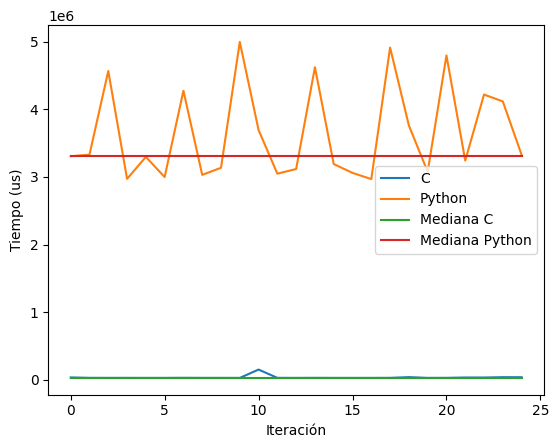

In [ ]:
import time
import matplotlib.pyplot as plt
import statistics

# Definir el tamaño de los arreglos
N = 2**11

# Generar arreglos aleatorios de tipo short, double y float
A_c = np.random.randint(2, size=N).astype(np.short)
B_c = np.random.rand(N).astype(np.double) * 10e-3
C_c = np.random.randint(2, size=N).astype(np.short)

# Hacer copias de los arreglos para la implementación en Python
A_py = np.copy(A_c)
B_py = np.copy(B_c)
C_py = np.copy(C_c)

# Inicializar arreglos de resultado en C y en Python
S_c = np.zeros(1).astype(np.float32)
S_py = np.zeros(1).astype(np.float32)

# Número de iteraciones para medir el tiempo
iter = 25

# Listas para almacenar los tiempos de ejecución de cada iteración
c_list = []
py_list = []

# Realizar las iteraciones
for i in range(iter):
    # Medir el tiempo de ejecución para la función en C
    tic = time.perf_counter()
    lib.funcion(A_c, B_c, C_c, N, S_c)
    toc = time.perf_counter()
    c_list.append((toc - tic) * 1e6)  # Convertir a microsegundos y guardar en la lista

    # Medir el tiempo de ejecución para la función en Python
    tic = time.perf_counter()
    funcion_py(A_py, B_py, C_py, N, S_py)
    toc = time.perf_counter()
    py_list.append((toc - tic) * 1e6)  # Convertir a microsegundos y guardar en la lista

# Graficar los resultados
plt.plot(range(iter), c_list, label='C')  # Graficar tiempos de C
plt.plot(range(iter), py_list, label='Python')  # Graficar tiempos de Python
plt.plot(range(iter), [statistics.median(c_list)] * iter, label='Mediana C')  # Graficar mediana de tiempos de C
plt.plot(range(iter), [statistics.median(py_list)] * iter, label='Mediana Python')  # Graficar mediana de tiempos de Python
plt.legend()  # Mostrar leyenda
plt.xlabel('Iteración')  # Etiqueta del eje x
plt.ylabel('Tiempo (us)')  # Etiqueta del eje y
plt.show()  # Mostrar gráfico


i)  Mostrar una gráfica del SpeedUP para valores de N que van desde $2^{10}$ hasta $2^{16}$. No olvidar las iteraciones y el cálculo de la mediana para tomar el tiempo representativo para cada N.

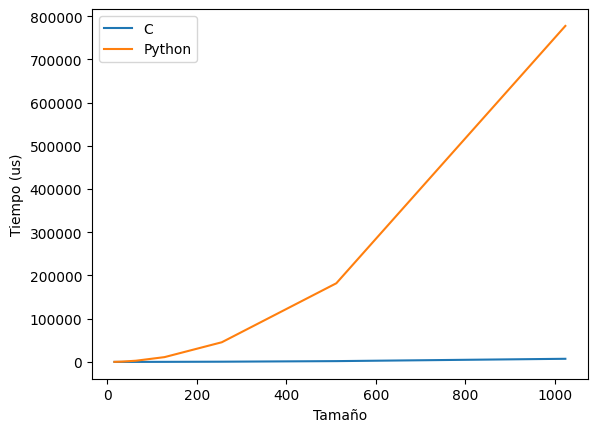

In [ ]:
import time
import matplotlib.pyplot as plt
import statistics

# Definir una lista de tamaños de N
N_list = 2**np.asarray([4, 5, 6, 7, 8, 9, 10])

# Listas para almacenar los tiempos de ejecución de C y Python para cada N
c_time = []
py_time = []

# Iterar sobre los diferentes tamaños de N
for N in N_list:
    # Generar arreglos aleatorios de tipo short, double y float para C y Python
    A_c = np.random.randint(2, size=N).astype(np.short)
    B_c = np.random.rand(N).astype(np.double) * 10e-3
    C_c = np.random.randint(2, size=N).astype(np.short)
    A_py = np.copy(A_c)
    B_py = np.copy(B_c)
    C_py = np.copy(C_c)

    # Inicializar arreglos de resultado en C y en Python
    S_c = np.zeros(1).astype(np.float32)
    S_py = np.zeros(1).astype(np.float32)

    # Número de iteraciones para medir el tiempo
    iter = 25
    c_list = []
    py_list = []

    # Realizar las iteraciones para medir el tiempo
    for i in range(iter):
        # Medir el tiempo de ejecución para la función en C
        tic = time.perf_counter()
        lib.funcion(A_c, B_c, C_c, N, S_c)
        toc = time.perf_counter()
        c_list.append((toc - tic) * 1e6)  # Convertir a microsegundos y guardar en la lista

        # Medir el tiempo de ejecución para la función en Python
        tic = time.perf_counter()
        funcion_py(A_py, B_py, C_py, N, S_py)
        toc = time.perf_counter()
        py_list.append((toc - tic) * 1e6)  # Convertir a microsegundos y guardar en la lista

    # Calcular la mediana de los tiempos para C y Python y agregarlos a las listas
    c_time.append(statistics.median(c_list))
    py_time.append(statistics.median(py_list))

# Graficar los resultados
plt.plot(N_list, c_time, label='C')  # Graficar tiempos de C
plt.plot(N_list, py_time, label='Python')  # Graficar tiempos de Python
plt.legend()  # Mostrar leyenda
plt.xlabel('Tamaño')  # Etiqueta del eje x
plt.ylabel('Tiempo (us)')  # Etiqueta del eje y
plt.show()  # Mostrar gráfico


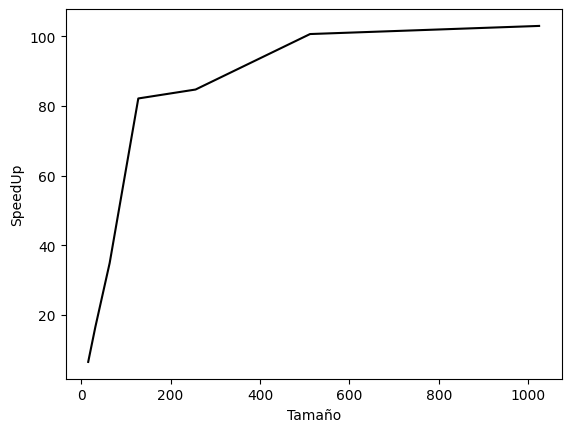

In [ ]:
# Graficar el speedup (aceleración) de Python respecto a C
# Speedup = Tiempo de ejecución en C / Tiempo de ejecución en Python
plt.plot(N_list, np.asarray(py_time) / np.asarray(c_time), 'k')  # Graficar el speedup
plt.xlabel('Tamaño')  # Etiqueta del eje x
plt.ylabel('SpeedUp')  # Etiqueta del eje y
plt.show()  # Mostrar gráfico


j) Realizar comentarios acerca de sus experiencias. Incluir específicamente sus conclusiones en las diferencias de implementación de C y Python.

Respuesta:


Respuesta: Se puede evidenciar que la función en C es significativamente más rápida que la función en python, aunque el speedup cada vez incrementa menos conforme el tamaño de los arreglos incrementa. Esto se debe a que C es un lenguaje de bajo nivel, por lo que emplea de manera más eficiente la memoria en contraste con python.